In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np
import math

In [4]:
class Funsolvea(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss") #loss_tracker pude ser cambiada por mivalor_de_costo o como queramos
        
        
    @property
    def metrics(self):
        return [self.loss_tracker] #igual cambia el loss_tracker
    
    
    def train_step(self, data):
        batch_size = 200 #Calibra la resolucion de la ec.dif
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        
        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #x_o = tf.zeros((batch_size,1))
            #y_o = self(x_o, training=True)
            eq = y_pred - 3.*tf.sin(math.pi*x)
            
            loss = keras.losses.mean_squared_error(0.,eq)
        
        #aplica los gradientes        
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        
        #actualiza metricas
        self.loss_tracker.update_state(loss)
        
        return {"loss": self.loss_tracker.result()}
    


In [5]:
    model = Funsolvea()
    
    model.add(Dense(100,activation ='tanh', input_shape=(1,)))
    model.add(Dense(10, activation ='tanh'))
    model.add(Dense(10, activation ='tanh'))
    model.add(Dense(1, activation ='linear'))
    
    model.summary()
    
    epochs = 3000 #cuantas veces entrenar. En cada epoch hace una mejora en los parametros
    #learning_rate = 0.07
    
    model.compile(optimizer=RMSprop(), metrics=['loss'])
    
    x=tf.linspace(-1,1,100)
    history = model.fit(x,epochs=epochs,verbose=0)
    
    x_testv = tf.linspace(-1,1,100)
    a=model.predict(x_testv)
    

    model.save("RNA_EDO1_a.h5")

    

Model: "funsolvea"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1331 (5.20 KB)
Trainable params: 1331 (5.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 0s 4ms/step


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


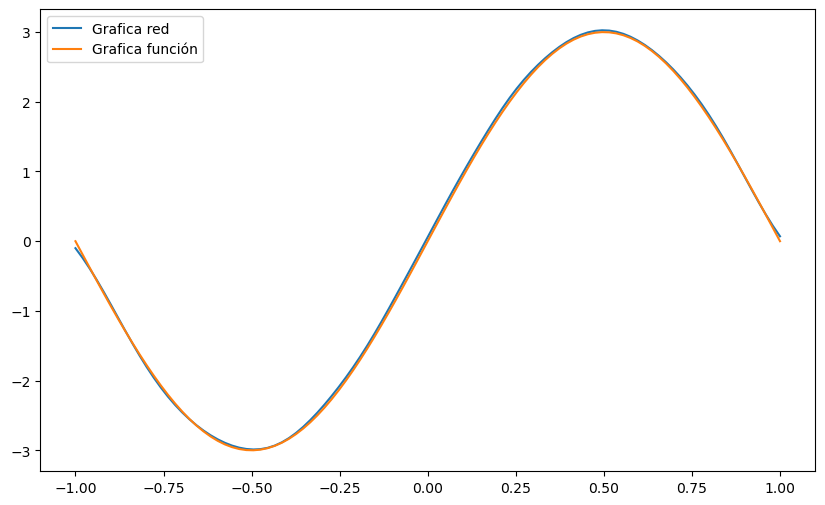

In [6]:
plt.figure(figsize=(10,6))
plt.plot(x_testv,a)
plt.plot(x_testv, 3*np.sin(np.pi*x))
legend = ['Grafica red','Grafica función']
plt.legend(loc='upper left', labels= legend)
plt.show()

In [7]:
class Funsolveb(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss") #loss_tracker pude ser cambiada por mivalor_de_costo o como queramos
        
        
    @property
    def metrics(self):
        return [self.loss_tracker] #igual cambia el loss_tracker
    
    
    def train_step(self, data):
        batch_size =100 #Calibra la resolucion de la ec.dif
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        
        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #x_o = tf.zeros((batch_size,1))
            #y_o = self(x_o, training=True)
            eq = y_pred - 1 - 2*x - 4*x**3
            #eq =   1 + 2*x + 4*(x**3)
            #ic = y_o - 1.
            loss = keras.losses.mean_squared_error(0.,eq)
        
        #aplica los gradientes        
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        
        
        #actualiza metricas
        self.loss_tracker.update_state(loss)
        
        return {"loss": self.loss_tracker.result()}
    
    
    


In [8]:
    model2 = Funsolveb()
    
    model2.add(Dense(10,activation ='tanh', input_shape=(1,)))
    #model.add(Dropout(0.2))
    model2.add(Dense(10, activation ='tanh'))
    model2.add(Dense(50, activation ='tanh'))
    model2.add(Dense(50, activation ='tanh'))
    model2.add(Dense(10, activation ='tanh'))
    model2.add(Dense(1, activation ='tanh'))
    model2.add(Dense(1, activation ='linear'))
    
    model2.summary()
    
    model2.compile(optimizer=RMSprop(), metrics=['loss'])
    
    x=tf.linspace(-1,1,100)
    history = model2.fit(x,epochs=4000,verbose=0)
    
    x_test = tf.linspace(-1,1,100)
    a=model2.predict(x_test)
    

model.save("RNA_EDO1_b.h5")

Model: "funsolveb"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 50)                550       
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 10)                510       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
 dense_10 (Dense)            (None, 1)                 2 

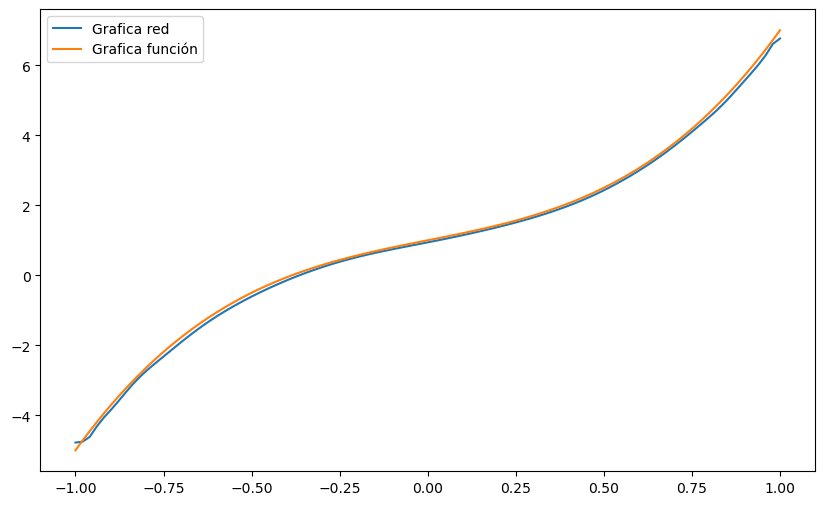

In [9]:
plt.figure(figsize=(10,6))
plt.plot(x_test,a)
plt.plot(x_test, 1+2*x+4*(x**3))
legend = ['Grafica red','Grafica función']
plt.legend(loc='upper left', labels= legend)
plt.show()